### 

### Reference

- Thieulot, C. (2014). ELEFANT: a user-friendly multipurpose geodynamics code. Solid Earth Discussions, 6(2), 1949-2096.

In [1]:
import underworld as uw
import underworld.function as fn
from underworld import UWGeodynamics as GEO
import numpy as np
import math

import os
import h5py   
import matplotlib.pyplot as plt

u = GEO.UnitRegistry

loaded rc file /opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
x_res,y_res = 50,50
fdir_output = "pp_Thieulot2014ELEFANT_StressBcs_Light_mid_Calpre"

gravity = 1.

Model = GEO.Model(elementRes=(x_res, y_res),
                  minCoord=(0. , 0.),
                  maxCoord=(1., 1.),
                  gravity=(0.0, -gravity))
Model.outputDir=fdir_output
#Model.minStrainRate = 1e-18 / u.second

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50
In func WeightsCalculator_CalculateAll(): for swarm "Y3H1TPVO__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "Y3H1TPVO__swarm"


In [3]:
ma1_Shape1 = fn.input()[0] < 0.375
ma1_Shape2 = fn.input()[0] > 0.625
ma1_Shape  = ma1_Shape1 | ma1_Shape2 
ma2_Shape = (fn.input()[0] >= 0.375) & (fn.input()[0] <= 0.625)
 

ma1 = Model.add_material(name="Material 1", shape=ma1_Shape)
ma2 = Model.add_material(name="Material 2", shape=ma2_Shape) 


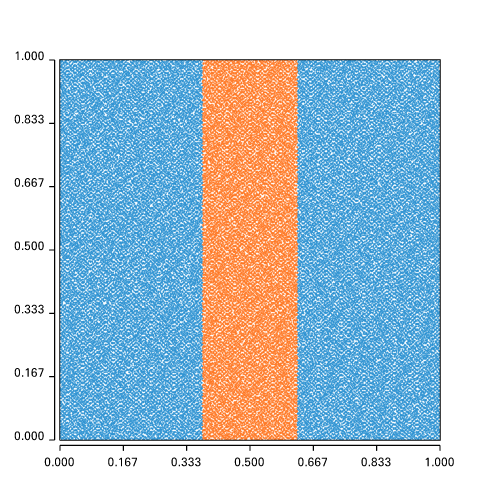

In [4]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.show()
    Fig.save("ModelSetup.png")

In [5]:
ma1.density =  1.
ma2.density =  0.95


Model.minViscosity = 1.
Model.maxViscosity = 1e4

ma1.viscosity      = 1.
ma2.viscosity      = 1e4

Model.initialize_pressure_to_lithostatic()
Model._calibrate_pressureField()


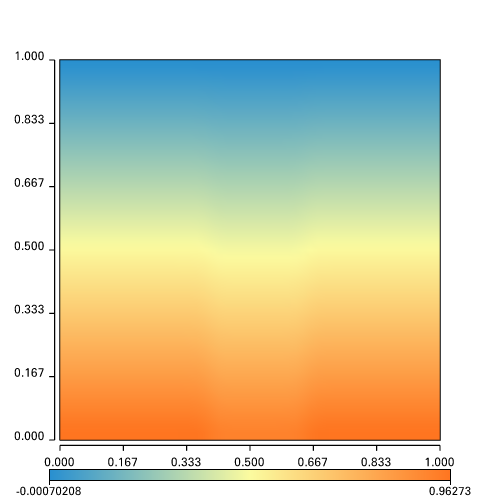

In [6]:
Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
Fig.Surface(Model.mesh, Model.pressureField)
Fig.show()

In [7]:
# tmp1 = uw.utils.Integral(fn=Model._densityFn*GEO.nd(gravity),mesh=Model.mesh, integrationType='volume')
# tmp2 = uw.utils.Integral(fn=1.,mesh=Model.mesh, integrationType='Surface',surfaceIndexSet=Model.bottom_wall)
# pbot = tmp1.evaluate()[0]/(tmp2.evaluate()[0])  # pbot = 1.0125000000001649

pbot = 1.

In [8]:
Model.set_velocityBCs(left = [0.,0.],right=[0., 0.])
Model.set_stressBCs(bottom=[None,pbot])


Model.freeSurface = True

Model.solver.set_inner_method("mg")
Model.solver.set_penalty(1e-4)

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50


In [ ]:
Model.temperatureDot = Model._temperatureDot

Total_Time = 1000
checkpoint_interval=checkpoint_interval = 10
dt = 0.1

#Model.run_for(nstep=1500, checkpoint_interval=10,dt=0.1)
Model.run_for(Total_Time, checkpoint_interval=checkpoint_interval,dt=dt)

Options:  -Q22_pc_type gkgdiag -force_correction True -ksp_type bsscr -pc_type none -ksp_k2_type NULL -rescale_equations False -remove_constant_pressure_null_space False -change_backsolve False -change_A11rhspresolve False -restore_K False -A11_ksp_type fgmres -A11_ksp_rtol 1e-05 -scr_ksp_type fgmres -scr_ksp_rtol 1e-05
Linear solver (MPL9NK0C__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002829 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22803e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001353 secs 
  RHS V Solve:            = 0.003633 secs / 7 its
  Pressure Solve:         = 0.1187 secs / 28 its
  Final V Solve:          = 0.00483 secs / 7 its

  Total BSSCR Linear solve time: 0.142162 seconds

Linear solver (MPL9NK0C__system-execute), solution time 1.428259e-01 (secs)
Time Integration
	2nd order:      

Time Integration
	2nd order:                 ZRWX76SN__integrand -    0.0859 [min] /    0.0859 [max] (secs)
Time Integration - 0.0859262 [min] / 0.0859262 [max] (secs)
Linear solver (7Y76KKN9__system-execute) 
Linear solver (7Y76KKN9__system-execute), solution time 2.328949e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "Y3H1TPVO__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "Y3H1TPVO__swarm"
Step:     7 Model Time: 255.7 day dt: 36.5 day (2023-06-03 22:28:13)
Linear solver (MPL9NK0C__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002600 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20341e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0013 secs 
  RHS V Solve:            = 0.003234 secs 

Linear solver (MPL9NK0C__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002503 seconds

SROpGenerator_SimpleFinestLevel: time = 1.15730e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001239 secs 
  RHS V Solve:            = 0.003447 secs / 7 its
  Pressure Solve:         = 0.1172 secs / 28 its
  Final V Solve:          = 0.003317 secs / 7 its

  Total BSSCR Linear solve time: 0.137679 seconds

Linear solver (MPL9NK0C__system-execute), solution time 1.379824e-01 (secs)
Time Integration
	2nd order:                 ZRWX76SN__integrand -    0.0784 [min] /    0.0784 [max] (secs)
Time Integration - 0.0784281 [min] / 0.0784281 [max] (secs)
Linear solver (7Y76KKN9__system-execute) 
Linear solver (7Y76KKN9__system-execute), solution time 2.392186e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "Y3H1TPVO__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "Y3H1TPVO__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "Y3H1TPVO__swarm"
Step:    20 Model Time: 2.0 year dt: 36.5 day (2023-06-03 22:28:28)
Linear solver (MPL9NK0C__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002331 seconds

SROpGenerator_SimpleFinestLevel: time = 1.07058e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001153 secs 
  RHS V Solve:            = 0.003303 secs / 7 its
  Pressure Solve:         = 0.0868 secs / 28 its
  Final V Solve:          = 0.003159 secs / 7 its

  Total BSSCR Linear solve time: 0.105363 seconds

Linear solver (MPL9NK0C__system-execute), solution time 1.056445e-01 (secs)
Time Integration
	2nd order:                 ZRWX7

Time Integration
	2nd order:                 ZRWX76SN__integrand -    0.0785 [min] /    0.0785 [max] (secs)
Time Integration - 0.0785777 [min] / 0.0785777 [max] (secs)
Linear solver (7Y76KKN9__system-execute) 
Linear solver (7Y76KKN9__system-execute), solution time 2.304116e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "Y3H1TPVO__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "Y3H1TPVO__swarm"
Step:    27 Model Time: 2.7 year dt: 36.5 day (2023-06-03 22:28:33)
Linear solver (MPL9NK0C__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002121 seconds

SROpGenerator_SimpleFinestLevel: time = 1.11576e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001197 secs 
  RHS V Solve:            = 0.003152 secs

Linear solver (MPL9NK0C__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002336 seconds

SROpGenerator_SimpleFinestLevel: time = 1.11116e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001192 secs 
  RHS V Solve:            = 0.003638 secs / 7 its
  Pressure Solve:         = 0.09443 secs / 28 its
  Final V Solve:          = 0.003024 secs / 7 its

  Total BSSCR Linear solve time: 0.114424 seconds

Linear solver (MPL9NK0C__system-execute), solution time 1.147286e-01 (secs)


In [ ]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.show()
    Fig.save("ModelResult_finalstep_light.png")

In [ ]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.VectorArrows(Model.mesh, Model.velocityField) 
    #Fig.Mesh(Model.mesh)
    Fig.show()
    Fig.save("ModelResult_finalstep_light_mesh.png")

In [ ]:
coords = Model.mesh.data[Model.top_wall]
xlim = [0.,0.25,0.5,0.75,1]


import matplotlib.pyplot as plt

Fig, ax1,  = plt.subplots(1,1,figsize=(10,4))

#ax1.set_title("Pressure at bottom")
ax1.set_xlabel('Distance')
ax1.set_ylabel('Topography')
ax1.set_xticks(xlim)

ax1.plot(coords[:,0],coords[:,1],'-', color = 'black')

#ax1.legend(loc='lower right')
#plt.savefig(Model.outputDir+"/Vel-{0}.png".format(Model.checkpointID))


In [ ]:
1-1*1*1/50/2/2

In [ ]:
0.95*0.25+0.75*1

In [ ]:
coords[:,1].mean()

In [ ]:
1/0.95*0.25+0.75

In [ ]:
1/0.95

In [ ]:
Model.velocityField.evaluate(Model.bottom_wall)

In [ ]:
Model.velocityField.evaluate(Model.top_wall)

In [ ]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.VectorArrows(Model.mesh, Model.velocityField) 
    #Fig.Mesh(Model.mesh)
    Fig.show()
    Fig.save("ModelResult_finalstep_dense_mesh.png")